In [6]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
# actively reload module (during working on analyse_embeddings.py)
import importlib
import matplotlib.image as mpimg
import mat73

from style_helper import *  # import color definitions
set_style()


## FoV size of virtual frame
fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree


## Scaling overview

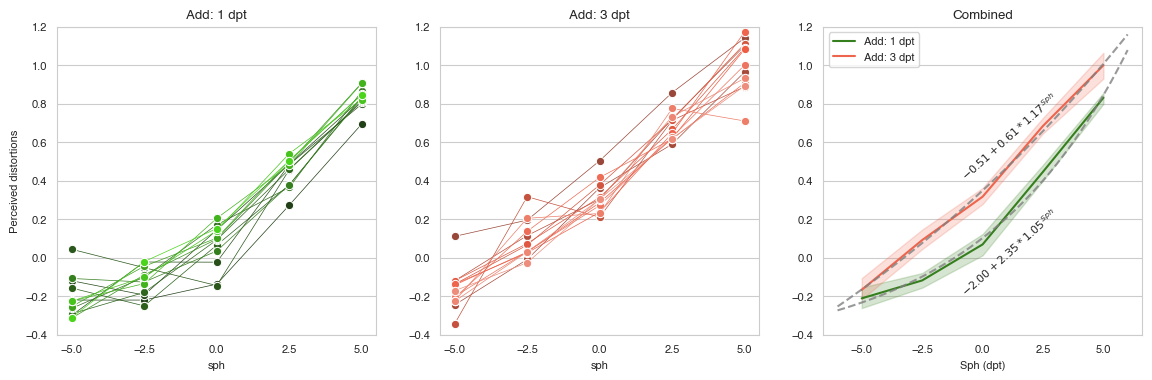

In [3]:
scales_df = pd.read_pickle('../data/scaling.pkl')
a = scales_df[(scales_df['add']==1)]
b = scales_df[(scales_df['add']==3)]

sb.color_palette("Set2")


fig, ax = plt.subplots(1,3)
fig.set_size_inches(14, 4)

plt.sca(ax[0])
sb.lineplot(
    data=a,
    x=a.sph, y="scaling", units="subj",hue='subj',palette=colors_add1,
    estimator=None, lw=0.5,alpha= 1,marker='o'
)
ax[0].set_title("Add: 1 dpt")

plt.sca(ax[1])
sb.lineplot(
    data=b,
    x="sph", y="scaling", units="subj",hue='subj',palette=colors_add3,
    estimator=None, lw=0.5,alpha= 1,marker='o'
)
ax[1].set_title("Add: 3 dpt")

plt.sca(ax[2])
sb.lineplot(data=a,x="sph", y="scaling",label='Add: 1 dpt',color=colors_add1[7]) #  [-2]
sb.lineplot(data=b,x="sph", y="scaling",label='Add: 3 dpt',color=colors_add3[7])
#sb.scatterplot(x=a.sph-0.07,y=a.scaling,marker='X',palette="Set2")
#sb.scatterplot(x=b.sph+0.07,y=b.scaling,marker='o',palette="Set2")

## add exponential fit
from scipy.optimize import curve_fit
def fit_fun(x, a, b, c):
    return a + b * c**x

fit1, fit1_cov = curve_fit(fit_fun, a.sph, a.scaling, [-0.75, 1, 1.1])
fit3, fit3_cov = curve_fit(fit_fun, b.sph, b.scaling, [-0.75, 1, 1.1])
x = np.linspace(a.sph.min()-1, a.sph.max()+1, 100)
plt.plot(x, fit1[0] + fit1[1] * fit1[2]**x, '--', alpha=0.8, c='grey')
plt.plot(x, fit3[0] + fit3[1] * fit3[2]**x, '--', alpha=0.8, c='grey')

# add text for fits
plt.text(-1, 0.4,f"${fit1[0]:.2f} + {fit1[1]:.2f} * {fit1[2]:.2f}^{{Sph}}$",rotation = 42)
plt.text(-1,-0.2,f"${fit3[0]:.2f} + {fit3[1]:.2f} * {fit3[2]:.2f}^{{Sph}}$",rotation = 42)

ax[0].set_xticks([-5,-2.5,0,2.5,5])
ax[1].set_xticks([-5,-2.5,0,2.5,5])
ax[2].set_xticks([-5,-2.5,0,2.5,5])
ax[2].set_title("Combined")

#plt.xticks([-5.1,-4.9,-2.6,-2.4,-0.1,0.1,2.4,2.6,4.9,5.1],
#            ["Add 1","Add 3","Add 1","Add 3","Add 1","Add 3","Add 1","Add 3","Add 1","Add 3"],rotation=90)

ax[0].xaxis.grid(False)
ax[1].xaxis.grid(False)
ax[2].xaxis.grid(False)

ax[0].get_legend().remove()
ax[1].get_legend().remove()


ax[0].set_ylim([-0.4,1.2])
ax[1].set_ylim([-0.4,1.2])
ax[2].set_ylim([-0.4,1.2])

ax[0].set_ylabel("Perceived distortions")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

plt.xlabel("Sph (dpt)")

plt.savefig('scaling_overview.pdf')

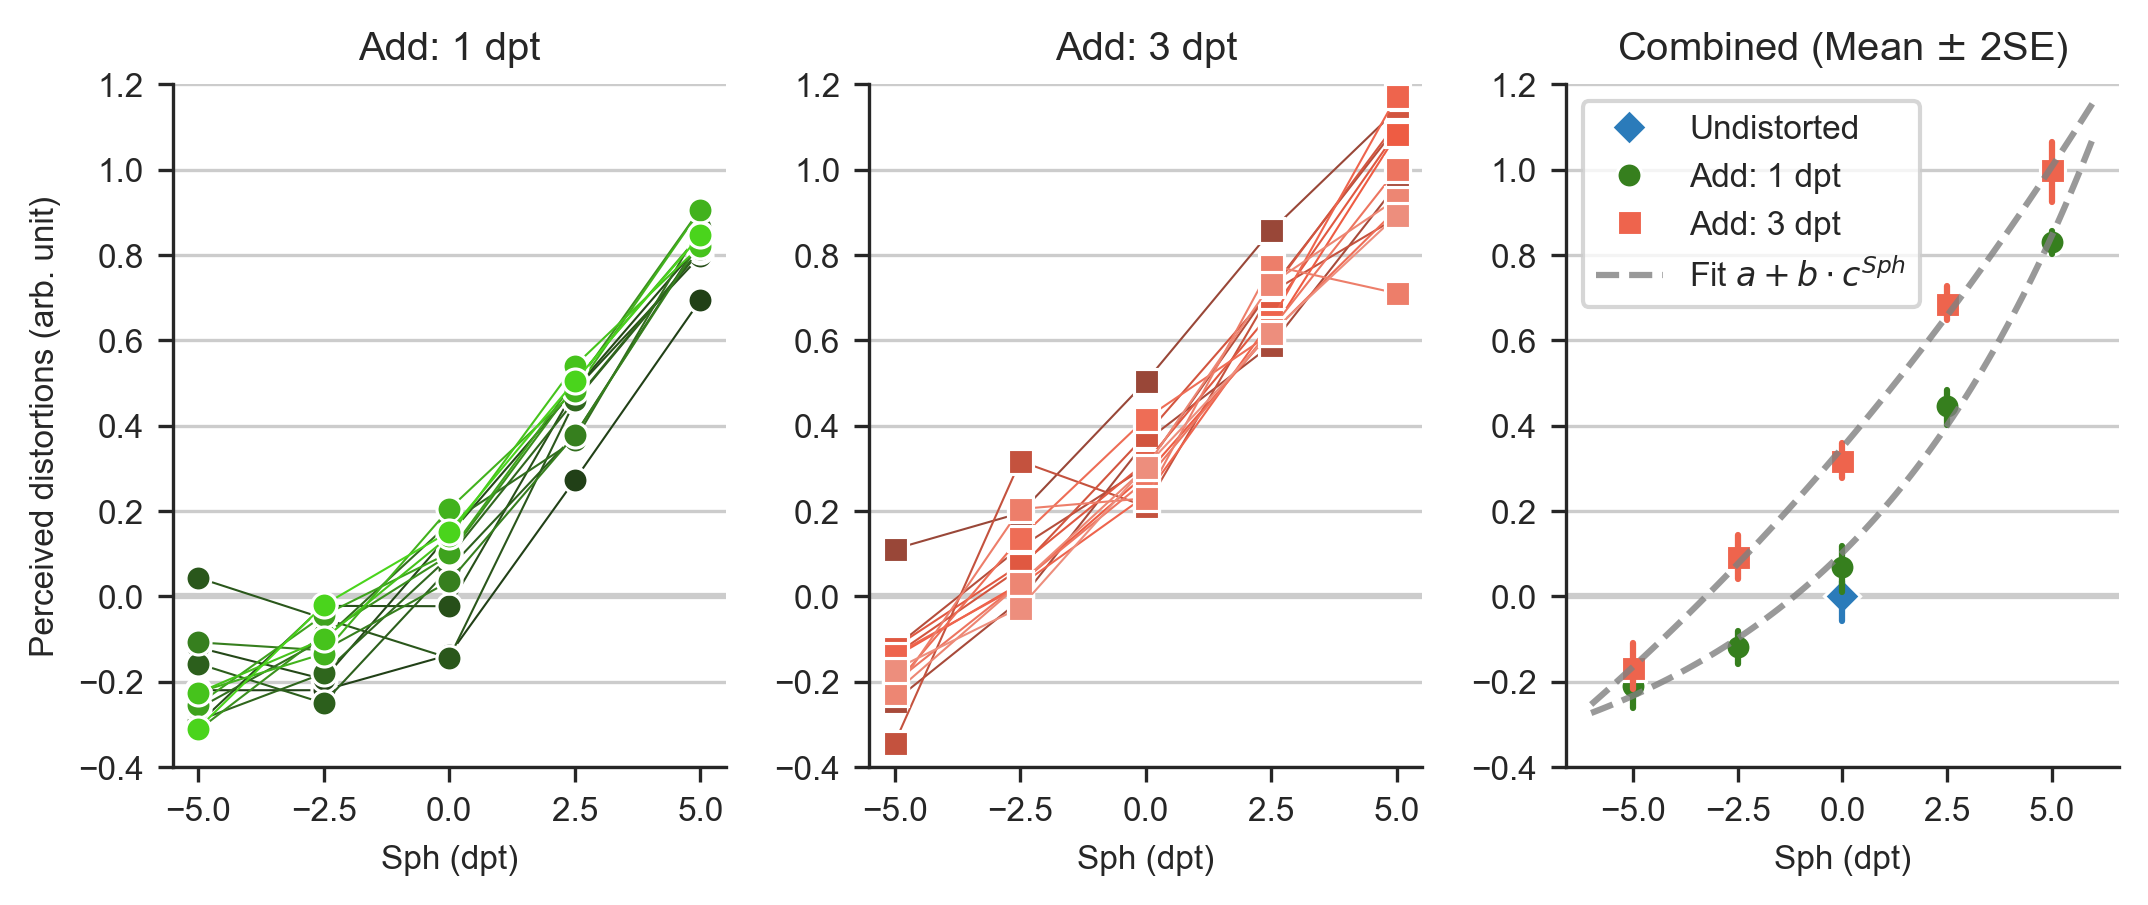

In [9]:
scales_df = pd.read_pickle('../data/scaling.pkl')
a = scales_df[(scales_df['add']==1)]
b = scales_df[(scales_df['add']==3)]
c = scales_df[(scales_df['add']==0)]

sb.color_palette("Set2")
sb.set_style("ticks")

cm = 1/2.54
fig, ax = plt.subplots(1,3,figsize=(18*cm, 7*cm),dpi = 300)
plt.tight_layout()

plt.sca(ax[0])
plt.axhline(0, color='#cccccc',lw=1.5)

sb.lineplot(
    data=a,
    x=a.sph, y="scaling", units="subj",hue='subj',palette=colors_add1,
    estimator=None, lw=0.5,alpha= 1,marker='o'
)
ax[0].set_title("Add: 1 dpt")
plt.grid()
sb.despine()


plt.sca(ax[1])
plt.axhline(0, color='#cccccc',lw=1.5)
sb.lineplot(
    data=b,
    x="sph", y="scaling", units="subj",hue='subj',palette=colors_add3,
    estimator=None, lw=0.5,alpha= 1,marker='s'
)
ax[1].set_title("Add: 3 dpt")
plt.grid()
sb.despine()


plt.sca(ax[2])
plt.axhline(0,color='#cccccc',lw=1.5)
sb.lineplot(data=c,x="sph", y="scaling",label='Undistorted',err_style="bars",markers=True,marker='D', linestyle='',color='#2b7bba')
sb.lineplot(data=a,x="sph", y="scaling",label='Add: 1 dpt',err_style="bars",markers=True,marker='o', linestyle='',color=colors_add1[7]) #  [-2]
sb.lineplot(data=b,x="sph", y="scaling",label='Add: 3 dpt',err_style="bars",markers=True,marker='s', linestyle='',color=colors_add3[7])
plt.grid()
sb.despine()


#sb.scatterplot(x=a.sph-0.07,y=a.scaling,marker='X',palette="Set2")
#sb.scatterplot(x=b.sph+0.07,y=b.scaling,marker='o',palette="Set2")

## add exponential fit
from scipy.optimize import curve_fit
def fit_fun(x, a, b, c):
    return a + b * c**x

fit1, fit1_cov = curve_fit(fit_fun, a.sph, a.scaling, [-0.75, 1, 1.1])
fit3, fit3_cov = curve_fit(fit_fun, b.sph, b.scaling, [-0.75, 1, 1.1])
x = np.linspace(a.sph.min()-1, a.sph.max()+1, 100)
plt.plot(x, fit1[0] + fit1[1] * fit1[2]**x, '--', alpha=0.8, c='grey',label = 'Fit $a + b \cdot c^{Sph}$')
plt.plot(x, fit3[0] + fit3[1] * fit3[2]**x, '--', alpha=0.8, c='grey')
plt.legend()
# add text for fits
#plt.text(-1, 0.4,f"${fit1[0]:.2f} + {fit1[1]:.2f} * {fit1[2]:.2f}^{{Sph}}$",rotation = 42)
#plt.text(-1,-0.2,f"${fit3[0]:.2f} + {fit3[1]:.2f} * {fit3[2]:.2f}^{{Sph}}$",rotation = 42)

ax[0].set_xticks([-5,-2.5,0,2.5,5])
ax[1].set_xticks([-5,-2.5,0,2.5,5])
ax[2].set_xticks([-5,-2.5,0,2.5,5])
ax[2].set_title(r"Combined (Mean $\pm$ 2SE)")

#plt.xticks([-5.1,-4.9,-2.6,-2.4,-0.1,0.1,2.4,2.6,4.9,5.1],
#            ["Add 1","Add 3","Add 1","Add 3","Add 1","Add 3","Add 1","Add 3","Add 1","Add 3"],rotation=90)

ax[0].xaxis.grid(False)
ax[1].xaxis.grid(False)
ax[2].xaxis.grid(False)

ax[0].get_legend().remove()
ax[1].get_legend().remove()

ax[0].set_ylim([-0.4,1.2])
ax[1].set_ylim([-0.4,1.2])
ax[2].set_ylim([-0.4,1.2])

ax[0].set_ylabel("Perceived distortions (arb. unit)")
ax[0].set_xlabel("Sph (dpt)")
ax[1].set_xlabel("Sph (dpt)")
ax[2].set_xlabel("Sph (dpt)")
ax[1].set_ylabel("")
ax[2].set_ylabel("")

plt.savefig('scaling_overview.svg', bbox_inches='tight', pad_inches = 0)

In [14]:
sb.color_palette("Greens")

[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

C:\Users\Newton\AppData\Local\Temp\ipykernel_4612\655495322.py:10: UserWarning: 
The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sb.lineplot(


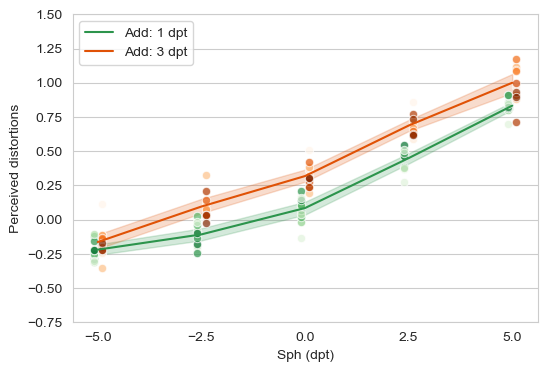

In [17]:
scales_df = pd.read_pickle('../../data/scaling.pkl')
a = scales_df[(scales_df['add']==1)]
b = scales_df[(scales_df['add']==3)]

sb.color_palette("Set2")

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

sb.lineplot(
    data=a,
    x=a.sph-0.1, y="scaling", units="subj",hue='subj',palette=sb.color_palette("Greens"),
    estimator=None, lw=0,alpha= 0.7,marker='o',label='_nolegend_'
)
sb.lineplot(
    data=b,
    x=b.sph+0.1, y="scaling", units="subj",hue='subj',palette="Oranges",
    estimator=None, lw=0,alpha= 0.7,marker='o',label='_nolegend_'
)

sb.lineplot(data=a,x="sph", y="scaling",label='Add: 1 dpt',color=sb.color_palette("Greens")[-2])
sb.lineplot(data=b,x="sph", y="scaling",label='Add: 3 dpt',color=sb.color_palette("Oranges")[-2])
#sb.scatterplot(x=a.sph-0.07,y=a.scaling,marker='X',palette="Set2")
#sb.scatterplot(x=b.sph+0.07,y=b.scaling,marker='o',palette="Set2")

ax.set_xticks([-5,-2.5,0,2.5,5])
#plt.xticks([-5.1,-4.9,-2.6,-2.4,-0.1,0.1,2.4,2.6,4.9,5.1],
#            ["Add 1","Add 3","Add 1","Add 3","Add 1","Add 3","Add 1","Add 3","Add 1","Add 3"],rotation=90)

ax.xaxis.grid(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[-2:], labels=labels[-2:])

ax.set_ylim([-0.75,1.5])
ax.set_ylabel("Perceived distortions")
plt.xlabel("Sph (dpt)")

plt.savefig('scaling_overview2.pdf')